In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, classification_report, ConfusionMatrixDisplay, f1_score, precision_score, plot_confusion_matrix, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [4]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline

In [5]:
pd.set_option('display.max_columns', None)

# Load CSV

In [6]:
acc_df = pd.read_csv('data.csv')

## Exploration

In [7]:
acc_df.describe()

,Unnamed: 0,count_reassign,count_opening,count_updated
count,99198.000000,99198.000000,99198.000000,99198.000000
mean,70820.997843,1.110426,0.022289,5.096857
std,40938.839626,1.751588,0.211605,7.748275
min,1.000000,0.000000,0.000000,0.000000
25%,35382.750000,0.000000,0.000000,1.000000
50%,70840.500000,1.000000,0.000000,3.000000
75%,106231.500000,1.000000,0.000000,6.000000
max,141711.000000,27.000000,8.000000,128.000000


In [8]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99198 entries, 0 to 99197
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          99198 non-null  int64 
 1   ID                  99198 non-null  object
 2   ID_status           99198 non-null  object
 3   active              99198 non-null  bool  
 4   count_reassign      99198 non-null  int64 
 5   count_opening       99198 non-null  int64 
 6   count_updated       99198 non-null  int64 
 7   ID_caller           99198 non-null  object
 8   opened_by           99198 non-null  object
 9   opened_time         99198 non-null  object
 10  Created_by          99198 non-null  object
 11  created_at          99198 non-null  object
 12  updated_by          99198 non-null  object
 13  updated_at          99198 non-null  object
 14  type_contact        99198 non-null  object
 15  location            99198 non-null  object
 16  category_ID         99

In [9]:
acc_df.impact.value_counts()

2 - Medium    94034
3 - Low        2720
1 - High       2444
Name: impact, dtype: int64

In [10]:
acc_df.ID_status.value_counts()

Active                27075
New                   25515
Resolved              18158
Closed                17387
Awaiting User Info    10235
Awaiting Vendor         493
Awaiting Problem        307
Awaiting Evidence        26
-100                      2
Name: ID_status, dtype: int64

In [11]:
acc_df.head(50)

,Unnamed: 0,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
0,1,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 21,29-02-2016 01:23,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
1,3,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 804,29-02-2016 11:29,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
2,4,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 908,05-03-2016 12:00,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
3,6,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 21,29-02-2016 05:30,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
4,7,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 21,29-02-2016 05:33,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
5,9,INC0000047,Active,True,1,0,4,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 703,29-02-2016 11:32,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
6,10,INC0000047,Active,True,1,0,5,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 332,01-03-2016 09:14,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
7,11,INC0000047,Awaiting User Info,True,1,0,6,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 332,01-03-2016 09:14,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 89,True,False,2 - Medium,Do Not Notify,?,?
8,13,INC0000047,Closed,False,1,0,8,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 908,06-03-2016 10:00,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 89,True,False,2 - Medium,Do Not Notify,?,?
9,14,INC0000057,New,True,0,0,0,Caller 4416,Opened by 8,29-02-2016 06:10,?,?,Updated by 21,29-02-2016 06:26,Phone,Location 204,Category 20,Symptom 471,Group 70,?,True,False,2 - Medium,Do Not Notify,?,?


In [12]:
acc_df.duplicated().sum()

0

### There are no duplicates in data set!

## There are some impact changes for tickets

In [13]:
testing_impact_change = acc_df.drop_duplicates(
  subset = ['ID', 'impact'],
  keep = 'first').reset_index(drop = True)

In [14]:
testing_impact_change.shape

(24858, 26)

In [15]:
testing_impact_change.head()

,Unnamed: 0,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
0,1,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 21,29-02-2016 01:23,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
1,6,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 21,29-02-2016 05:30,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
2,14,INC0000057,New,True,0,0,0,Caller 4416,Opened by 8,29-02-2016 06:10,?,?,Updated by 21,29-02-2016 06:26,Phone,Location 204,Category 20,Symptom 471,Group 70,?,True,False,2 - Medium,Do Not Notify,?,?
3,21,INC0000060,New,True,0,0,0,Caller 4491,Opened by 180,29-02-2016 06:38,Created by 81,29-02-2016 06:42,Updated by 340,29-02-2016 06:42,Phone,Location 204,Category 9,Symptom 450,Group 25,Resolver 125,True,False,2 - Medium,Do Not Notify,?,?
4,25,INC0000062,New,True,0,0,0,Caller 3765,Opened by 180,29-02-2016 06:58,Created by 81,29-02-2016 07:26,Updated by 340,29-02-2016 07:26,Phone,Location 93,Category 53,Symptom 232,Group 70,?,True,False,2 - Medium,Do Not Notify,?,?


In [16]:
impact_change_ids = testing_impact_change[testing_impact_change.ID.duplicated(keep=False)]

In [17]:
impact_change_ids = impact_change_ids[['ID', 'impact', 'count_opening', 'count_reassign', 'count_updated']]

In [18]:
impact_change_ids.shape

(573, 5)

In [19]:
impact_change_ids.head(20)

,ID,impact,count_opening,count_reassign,count_updated
4,INC0000062,2 - Medium,0,0,0
5,INC0000062,1 - High,0,0,1
73,INC0000161,2 - Medium,0,0,0
74,INC0000161,1 - High,0,1,3
75,INC0000161,3 - Low,0,2,5
81,INC0000171,2 - Medium,0,0,0
82,INC0000171,1 - High,0,0,1
159,INC0000341,3 - Low,0,0,7
160,INC0000341,1 - High,0,0,8
190,INC0000388,2 - Medium,0,0,0


### Only 573 rows are affected so I will not consider it


# Create copy for preprocessing and data cleaning

In [20]:
acc_df_new = acc_df.copy()

In [21]:
acc_df_new.shape

(99198, 26)

### There are "?" in data set. I will replace it with nans

In [22]:
acc_df_new.replace('?',np.nan,inplace=True)

In [23]:
acc_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99198 entries, 0 to 99197
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          99198 non-null  int64 
 1   ID                  99198 non-null  object
 2   ID_status           99198 non-null  object
 3   active              99198 non-null  bool  
 4   count_reassign      99198 non-null  int64 
 5   count_opening       99198 non-null  int64 
 6   count_updated       99198 non-null  int64 
 7   ID_caller           99176 non-null  object
 8   opened_by           95870 non-null  object
 9   opened_time         99198 non-null  object
 10  Created_by          62024 non-null  object
 11  created_at          62024 non-null  object
 12  updated_by          99198 non-null  object
 13  updated_at          99198 non-null  object
 14  type_contact        99198 non-null  object
 15  location            99144 non-null  object
 16  category_ID         99

In [24]:
acc_df_new.notify.value_counts()

Do Not Notify    99113
Send Email          85
Name: notify, dtype: int64

In [25]:
acc_df_new['impact'].value_counts(normalize=True)

2 - Medium    0.947942
3 - Low       0.027420
1 - High      0.024638
Name: impact, dtype: float64

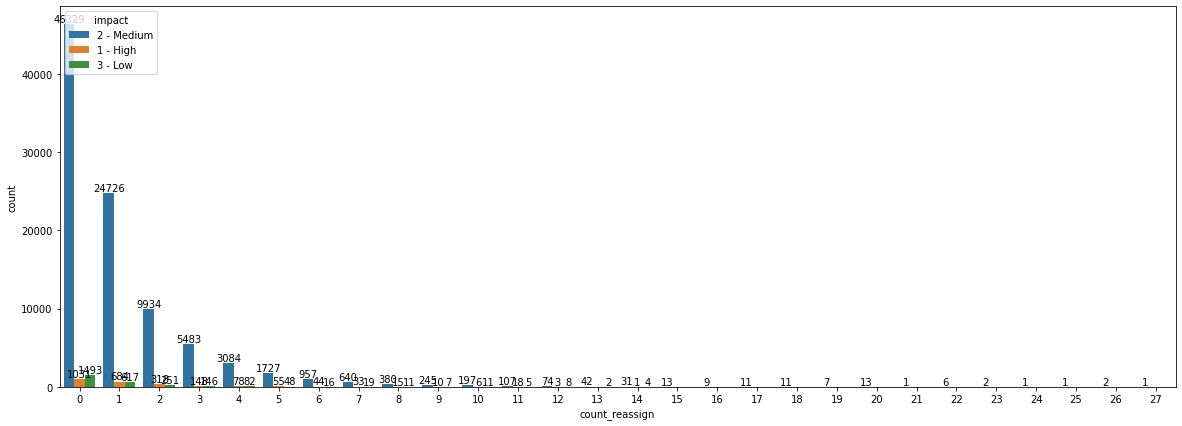

In [26]:
plt.figure(figsize=(20,7))
ax = sns.countplot(x='count_reassign', hue='impact',data=acc_df_new)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

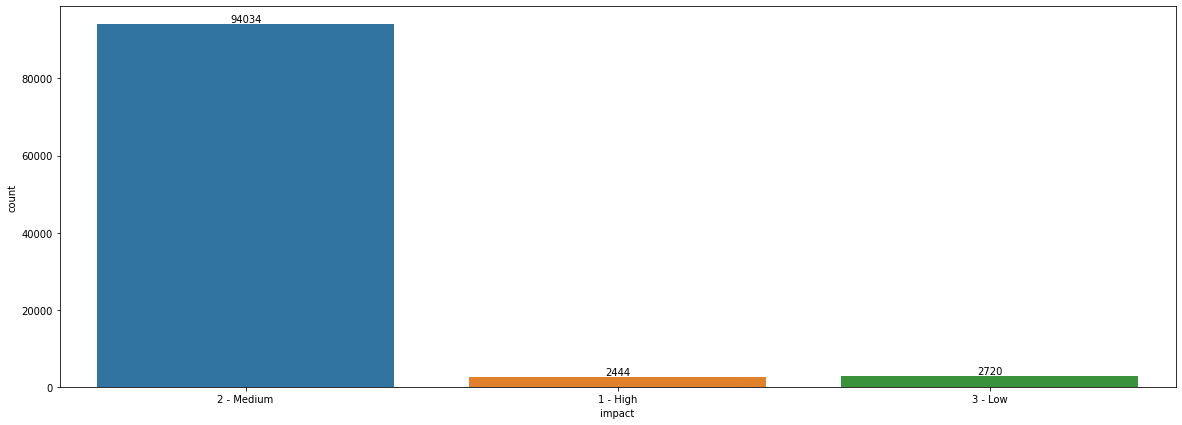

In [27]:
plt.figure(figsize=(20,7))
ax = sns.countplot(x='impact',data=acc_df_new)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Most of cases have medium impact. Data set is unbalanced

## Plot impact value for different ID_status

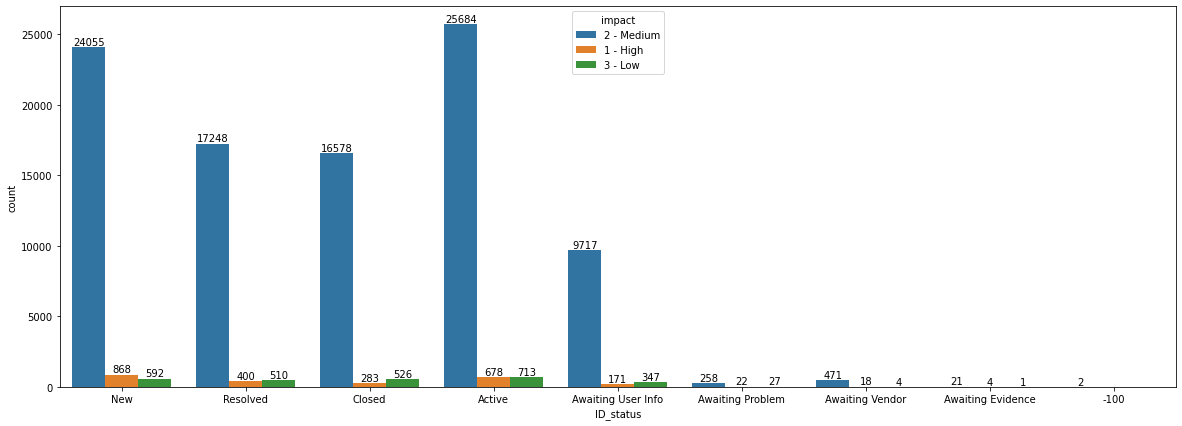

In [28]:
plt.figure(figsize=(20,7))
ax = sns.countplot(x='ID_status',hue='impact',data=acc_df_new)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## There are only two -100 statuses. I will remove them

In [29]:
acc_df_new[acc_df_new.ID_status == '-100']

,Unnamed: 0,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
87160,124508,INC0030413,-100,True,1,0,14,Caller 2950,Opened by 17,17-05-2016 14:42,Created by 10,17-05-2016 14:45,Updated by 258,15-06-2016 17:15,Phone,Location 224,Category 46,NaN,Group 17,Resolver 77,False,False,2 - Medium,Do Not Notify,NaN,NaN
87161,124509,INC0030413,-100,True,1,0,15,Caller 2950,Opened by 17,17-05-2016 14:42,Created by 10,17-05-2016 14:45,Updated by 528,15-06-2016 17:21,Phone,Location 224,Category 46,NaN,Group 17,Resolver 77,False,False,2 - Medium,Do Not Notify,NaN,NaN


In [30]:
acc_df_new.shape

(99198, 26)

In [31]:
acc_df_new = acc_df_new[acc_df_new.ID_status != '-100']

In [32]:
acc_df_new.shape

(99196, 26)

In [33]:
acc_df_new.isnull().sum().sort_values()

Unnamed: 0                0
notify                    0
impact                    0
confirmation_check        0
Doc_knowledge             0
type_contact              0
updated_at                0
opened_time               0
updated_by                0
ID                        0
ID_status                 0
active                    0
count_updated             0
count_opening             0
count_reassign            0
ID_caller                22
location                 54
category_ID              56
opened_by              3328
Support_group          9994
support_incharge      19302
user_symptom          23137
created_at            37174
Created_by            37174
problem_ID            97618
change_request        98510
dtype: int64

In [34]:
nulls=acc_df_new.isnull().sum()/acc_df_new.shape[0]*100
nulls.sort_values()

Unnamed: 0             0.000000
notify                 0.000000
impact                 0.000000
confirmation_check     0.000000
Doc_knowledge          0.000000
type_contact           0.000000
updated_at             0.000000
opened_time            0.000000
updated_by             0.000000
ID                     0.000000
ID_status              0.000000
active                 0.000000
count_updated          0.000000
count_opening          0.000000
count_reassign         0.000000
ID_caller              0.022178
location               0.054438
category_ID            0.056454
opened_by              3.354974
Support_group         10.075003
support_incharge      19.458446
user_symptom          23.324529
created_at            37.475301
Created_by            37.475301
problem_ID            98.409210
change_request        99.308440
dtype: float64

In [35]:
for i in acc_df_new.columns:
    print(i)
    print(acc_df_new[i].value_counts())
    print('Unique: ', acc_df_new[i].nunique())
    print('============================================================')

Unnamed: 0
133121    1
74958     1
7337      1
5288      1
138035    1
         ..
37511     1
39558     1
33413     1
35460     1
2047      1
Name: Unnamed: 0, Length: 99196, dtype: int64
Unique:  99196
ID
INC0044260    41
INC0019396    41
INC0020718    34
INC0012815    33
INC0007349    32
              ..
INC0115409     1
INC0017821     1
INC0002681     1
INC0013857     1
INC0009467     1
Name: ID, Length: 24569, dtype: int64
Unique:  24569
ID_status
Active                27075
New                   25515
Resolved              18158
Closed                17387
Awaiting User Info    10235
Awaiting Vendor         493
Awaiting Problem        307
Awaiting Evidence        26
Name: ID_status, dtype: int64
Unique:  8
active
True     81808
False    17388
Name: active, dtype: int64
Unique:  2
count_reassign
0     48853
1     26025
2     10503
3      5777
4      3244
5      1830
6      1017
7       692
8       406
9       262
10      214
11      130
12       85
13       44
14       36
15      

## problem_ID and change_request all almost all nulls so I will remove them. Also notify seems of no use (almost all rows use the same value). Unnamed looks like old index, can be removed

In fact support_group, support_incharge, doc_knowledge, confirmation_check, Doc_knowledge, confirmation_check, notify, Problem_id, change_request are manually selected after incident is rised so there is no point of using them (When those feature are assigned we already know impact, even if impact change trough course of incident solution it is only small percentage)

In [36]:
acc_df_new=acc_df_new.drop(['problem_ID','change_request','notify','Unnamed: 0', 'Support_group','support_incharge','Doc_knowledge','confirmation_check'],axis=1)

In [37]:
acc_df_new.shape

(99196, 18)

<AxesSubplot:>

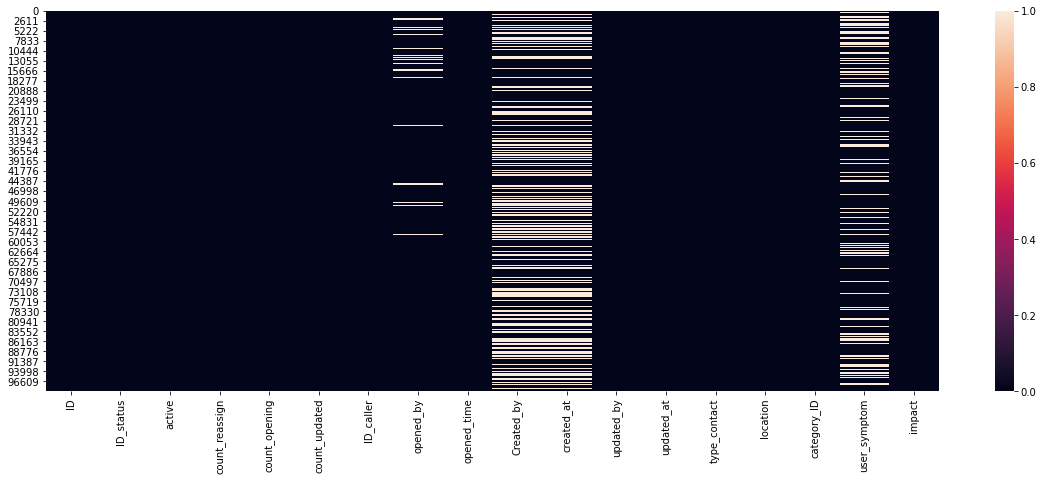

In [38]:
plt.figure(figsize=(20,7))
sns.heatmap(acc_df_new.isnull())

<AxesSubplot:>

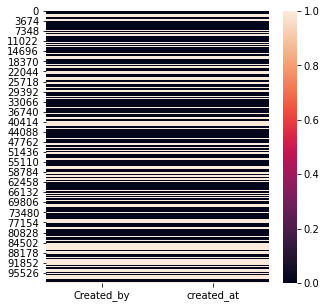

In [39]:
plt.figure(figsize=(5,5))
sns.heatmap(acc_df_new[['Created_by', 'created_at']].isnull())

In [40]:
acc_df_new.created_at.value_counts()

04-07-2016 14:50    41
15-03-2016 15:19    38
19-04-2016 11:32    36
30-03-2016 08:23    33
24-05-2016 09:14    32
                    ..
20-04-2016 08:38     1
11-05-2016 21:29     1
31-03-2016 09:08     1
23-03-2016 17:58     1
30-03-2016 00:57     1
Name: created_at, Length: 11484, dtype: int64

In [41]:
acc_df_new.dtypes

ID                object
ID_status         object
active              bool
count_reassign     int64
count_opening      int64
count_updated      int64
ID_caller         object
opened_by         object
opened_time       object
Created_by        object
created_at        object
updated_by        object
updated_at        object
type_contact      object
location          object
category_ID       object
user_symptom      object
impact            object
dtype: object

In [42]:
acc_df_new.count_reassign.value_counts()

0     48853
1     26025
2     10503
3      5777
4      3244
5      1830
6      1017
7       692
8       406
9       262
10      214
11      130
12       85
13       44
14       36
15       13
20       13
17       11
18       11
16        9
19        7
22        6
23        2
26        2
21        1
24        1
25        1
27        1
Name: count_reassign, dtype: int64

## Change dates to datetype

In [43]:
acc_df_new['opened_time'] = acc_df_new['opened_time'].astype('datetime64[ns]')

In [44]:
acc_df_new['updated_at'] = acc_df_new['updated_at'].astype('datetime64[ns]')

In [45]:
acc_df_new['created_at'] = acc_df_new['created_at'].astype('datetime64[ns]')

In [46]:
acc_df_new.dtypes

ID                        object
ID_status                 object
active                      bool
count_reassign             int64
count_opening              int64
count_updated              int64
ID_caller                 object
opened_by                 object
opened_time       datetime64[ns]
Created_by                object
created_at        datetime64[ns]
updated_by                object
updated_at        datetime64[ns]
type_contact              object
location                  object
category_ID               object
user_symptom              object
impact                    object
dtype: object

In [47]:
test = pd.DataFrame()

In [48]:
test['created_at'] = acc_df_new['created_at'].astype('datetime64[ns]')

In [49]:
test['created_at'].value_counts()

2016-04-07 14:50:00    41
2016-03-15 15:19:00    38
2016-04-19 11:32:00    36
2016-03-30 08:23:00    33
2016-05-24 09:14:00    32
                       ..
2016-04-14 18:26:00     1
2016-03-27 23:09:00     1
2016-11-04 07:06:00     1
2016-03-21 13:05:00     1
2016-03-22 11:17:00     1
Name: created_at, Length: 11484, dtype: int64

In [50]:
test.isnull().sum().sort_values()

created_at    37174
dtype: int64

In [51]:
test[test['created_at'].isnull()]

,created_at
9,NaT
10,NaT
11,NaT
12,NaT
13,NaT
...,...
99193,NaT
99194,NaT
99195,NaT
99196,NaT


In [52]:
acc_df_new['update_time_sec'] = (acc_df_new['updated_at'] - acc_df_new['opened_time']).dt.total_seconds()

In [53]:
test.head()

,created_at
0,2016-02-29 01:23:00
1,2016-02-29 01:23:00
2,2016-02-29 01:23:00
3,2016-02-29 04:57:00
4,2016-02-29 04:57:00


In [54]:
acc_df_new[acc_df_new.update_time_sec < 0 ].shape[0]/acc_df_new.shape[0]*100

14.419936287753538

### 14.42% of data have negative time difference between opened_time and updated_at (ticket was updated even before opened). 
### I will remove it

In [55]:
acc_df_new[acc_df_new.update_time_sec < 0 ].ID_status.value_counts()

Closed                5959
Active                3109
Resolved              2271
Awaiting User Info    1933
New                    788
Awaiting Vendor        193
Awaiting Problem        50
Awaiting Evidence        1
Name: ID_status, dtype: int64

In [56]:
acc_df_new[acc_df_new.update_time_sec == 0 ].ID_status.value_counts()

New                   4590
Active                2543
Resolved              1118
Awaiting User Info      45
Closed                   7
Awaiting Problem         1
Name: ID_status, dtype: int64

In [57]:
acc_df_new = acc_df_new[acc_df_new.update_time_sec >= 0 ]

Update time sec can be dropped now

In [58]:
acc_df_new = acc_df_new.drop(['update_time_sec'],axis=1)

## To fill nans in created_at I need to calculate mean difference between created_at and opened_time and add it to opened_time for rows with missing values at created_at

In [59]:
test2 = pd.DataFrame()

In [60]:
test2 = acc_df_new[['opened_time', 'created_at']]

In [61]:
acc_df_new['time_to_open_sec'] = (acc_df_new['created_at'] - acc_df_new['opened_time']).dt.total_seconds()

In [62]:
acc_df_new.head()

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,category_ID,user_symptom,impact,time_to_open_sec
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 21,2016-02-29 01:23:00,Phone,Location 143,Category 55,Symptom 72,2 - Medium,420.0
1,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 804,2016-02-29 11:29:00,Phone,Location 143,Category 55,Symptom 72,2 - Medium,420.0
2,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 908,2016-05-03 12:00:00,Phone,Location 143,Category 55,Symptom 72,2 - Medium,420.0
3,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 21,2016-02-29 05:30:00,Phone,Location 165,Category 40,Symptom 471,2 - Medium,1020.0
4,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 21,2016-02-29 05:33:00,Phone,Location 165,Category 40,Symptom 471,2 - Medium,1020.0


Mean time to open for all rows

In [63]:
acc_df_new['time_to_open_sec'].mean()

937.1703172205438

In [64]:
print(timedelta(seconds=acc_df_new['time_to_open_sec'].mean()))

0:15:37.170317


In [65]:
acc_df_new[acc_df_new.time_to_open_sec < 0 ].shape[0]/acc_df_new.shape[0]*100

0.024737313292183007

In [66]:
acc_df_new[acc_df_new.time_to_open_sec < 0 ].time_to_open_sec.value_counts()

-7140.0        4
-5400.0        4
-5340.0        4
-8640.0        3
-8820.0        3
-7080.0        2
-12632040.0    1
Name: time_to_open_sec, dtype: int64

In [67]:
acc_df_new[acc_df_new.time_to_open_sec == -12632040.0]

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,category_ID,user_symptom,impact,time_to_open_sec
97923,INC0034404,Closed,False,1,0,3,Caller 4818,Opened by 17,2016-05-31 17:16:00,Created by 10,2016-01-06 12:22:00,Updated by 908,2016-06-06 15:07:00,Phone,Location 93,Category 42,Symptom 532,2 - Medium,-12632040.0


### Mean for only positive values (ticket opened after creation)

In [68]:
print(timedelta(seconds=acc_df_new[acc_df_new['time_to_open_sec'] > 0].time_to_open_sec.mean()))

0:19:54.240331


In [69]:
positive_mean = acc_df_new[acc_df_new['time_to_open_sec'] > 0].time_to_open_sec.mean()
positive_mean

1194.2403306987158

In [70]:
acc_df_new['created_at_mean'] = acc_df_new.opened_time + timedelta(seconds=positive_mean)

### Now missing values in created_at can be filled

In [71]:
acc_df_new['created_at'].fillna(value=acc_df_new['created_at_mean'],inplace=True)

In [72]:
acc_df_new.created_at_mean.value_counts()

2016-04-14 21:01:54.240331    36
2016-03-30 08:39:54.240331    36
2016-03-15 15:01:54.240331    35
2016-03-30 09:39:54.240331    35
2016-07-03 11:23:54.240331    33
                              ..
2016-04-25 17:47:54.240331     1
2016-04-25 12:57:54.240331     1
2016-09-05 03:03:54.240331     1
2016-06-04 15:16:54.240331     1
2016-05-13 13:35:54.240331     1
Name: created_at_mean, Length: 19336, dtype: int64

In [73]:
acc_df_new.created_at.isnull().sum()

0

Time to open is no longer required

In [74]:
acc_df_new = acc_df_new.drop(['time_to_open_sec'],axis=1)

In [75]:
acc_df_new.isnull().sum()

ID                     0
ID_status              0
active                 0
count_reassign         0
count_opening          0
count_updated          0
ID_caller             20
opened_by           2876
opened_time            0
Created_by         31932
created_at             0
updated_by             0
updated_at             0
type_contact           0
location              52
category_ID           51
user_symptom       19241
impact                 0
created_at_mean        0
dtype: int64

In [76]:
acc_df_new.user_symptom.value_counts()

Symptom 491    31758
Symptom 534     3458
Symptom 4       1573
Symptom 387     1532
Symptom 116     1475
               ...  
Symptom 248        1
Symptom 265        1
Symptom 193        1
Symptom 15         1
Symptom 229        1
Name: user_symptom, Length: 513, dtype: int64

In [77]:
acc_df_new['ID_caller'].fillna(acc_df_new['ID_caller'].mode()[0],inplace=True)
acc_df_new['opened_by'].fillna(acc_df_new['opened_by'].mode()[0],inplace=True)
acc_df_new['Created_by'].fillna(acc_df_new['Created_by'].mode()[0],inplace=True)
acc_df_new['location'].fillna(acc_df_new['location'].mode()[0],inplace=True)
acc_df_new['category_ID'].fillna(acc_df_new['category_ID'].mode()[0],inplace=True)
acc_df_new['user_symptom'].fillna(acc_df_new['user_symptom'].mode()[0],inplace=True)

In [78]:
acc_df_new.isnull().sum()

ID                 0
ID_status          0
active             0
count_reassign     0
count_opening      0
count_updated      0
ID_caller          0
opened_by          0
opened_time        0
Created_by         0
created_at         0
updated_by         0
updated_at         0
type_contact       0
location           0
category_ID        0
user_symptom       0
impact             0
created_at_mean    0
dtype: int64

## There is no null values!

# Data Encoding - catagorical columns

In [79]:
acc_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84892 entries, 0 to 99197
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               84892 non-null  object        
 1   ID_status        84892 non-null  object        
 2   active           84892 non-null  bool          
 3   count_reassign   84892 non-null  int64         
 4   count_opening    84892 non-null  int64         
 5   count_updated    84892 non-null  int64         
 6   ID_caller        84892 non-null  object        
 7   opened_by        84892 non-null  object        
 8   opened_time      84892 non-null  datetime64[ns]
 9   Created_by       84892 non-null  object        
 10  created_at       84892 non-null  datetime64[ns]
 11  updated_by       84892 non-null  object        
 12  updated_at       84892 non-null  datetime64[ns]
 13  type_contact     84892 non-null  object        
 14  location         84892 non-null  objec

In [80]:
acc_df_new.head(5)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,category_ID,user_symptom,impact,created_at_mean
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 21,2016-02-29 01:23:00,Phone,Location 143,Category 55,Symptom 72,2 - Medium,2016-02-29 01:35:54.240331
1,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 804,2016-02-29 11:29:00,Phone,Location 143,Category 55,Symptom 72,2 - Medium,2016-02-29 01:35:54.240331
2,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 908,2016-05-03 12:00:00,Phone,Location 143,Category 55,Symptom 72,2 - Medium,2016-02-29 01:35:54.240331
3,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 21,2016-02-29 05:30:00,Phone,Location 165,Category 40,Symptom 471,2 - Medium,2016-02-29 04:59:54.240331
4,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 21,2016-02-29 05:33:00,Phone,Location 165,Category 40,Symptom 471,2 - Medium,2016-02-29 04:59:54.240331


Lets replace text and transform columns alike ID_caller or Impact to ints

In [81]:
acc_df_new['impact'] = acc_df_new['impact'].replace({'1 - High':1,'2 - Medium':2,'3 - Low':3,})

In [82]:
cols_to_change = ['ID_caller', 'opened_by', 'Created_by', 'updated_by', 'location', 'category_ID', 'user_symptom']

In [83]:
for col in cols_to_change:
    acc_df_new[col] = acc_df_new[col].apply(lambda x: int(x.split(' ')[-1]))

ID and ceated_at_mean are not needed

In [84]:
acc_df_new = acc_df_new.drop(['ID', 'created_at_mean'],axis=1)

## Label encoding with sklearn

In [85]:
obj_and_bool_to_change = acc_df_new.select_dtypes(include=['object','bool'])

for col in obj_and_bool_to_change.columns:
    acc_df_new[col]=LabelEncoder().fit_transform(acc_df_new[col])

In [86]:
acc_df_new.head()

,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,category_ID,user_symptom,impact
0,6,1,0,0,0,2403,8,2016-02-29 01:16:00,6,2016-02-29 01:23:00,21,2016-02-29 01:23:00,3,143,55,72,2
1,7,1,0,0,3,2403,8,2016-02-29 01:16:00,6,2016-02-29 01:23:00,804,2016-02-29 11:29:00,3,143,55,72,2
2,5,0,0,0,4,2403,8,2016-02-29 01:16:00,6,2016-02-29 01:23:00,908,2016-05-03 12:00:00,3,143,55,72,2
3,0,1,1,0,1,2403,397,2016-02-29 04:40:00,171,2016-02-29 04:57:00,21,2016-02-29 05:30:00,3,165,40,471,2
4,0,1,1,0,2,2403,397,2016-02-29 04:40:00,171,2016-02-29 04:57:00,21,2016-02-29 05:33:00,3,165,40,471,2


# Correlation Matrix for all current features

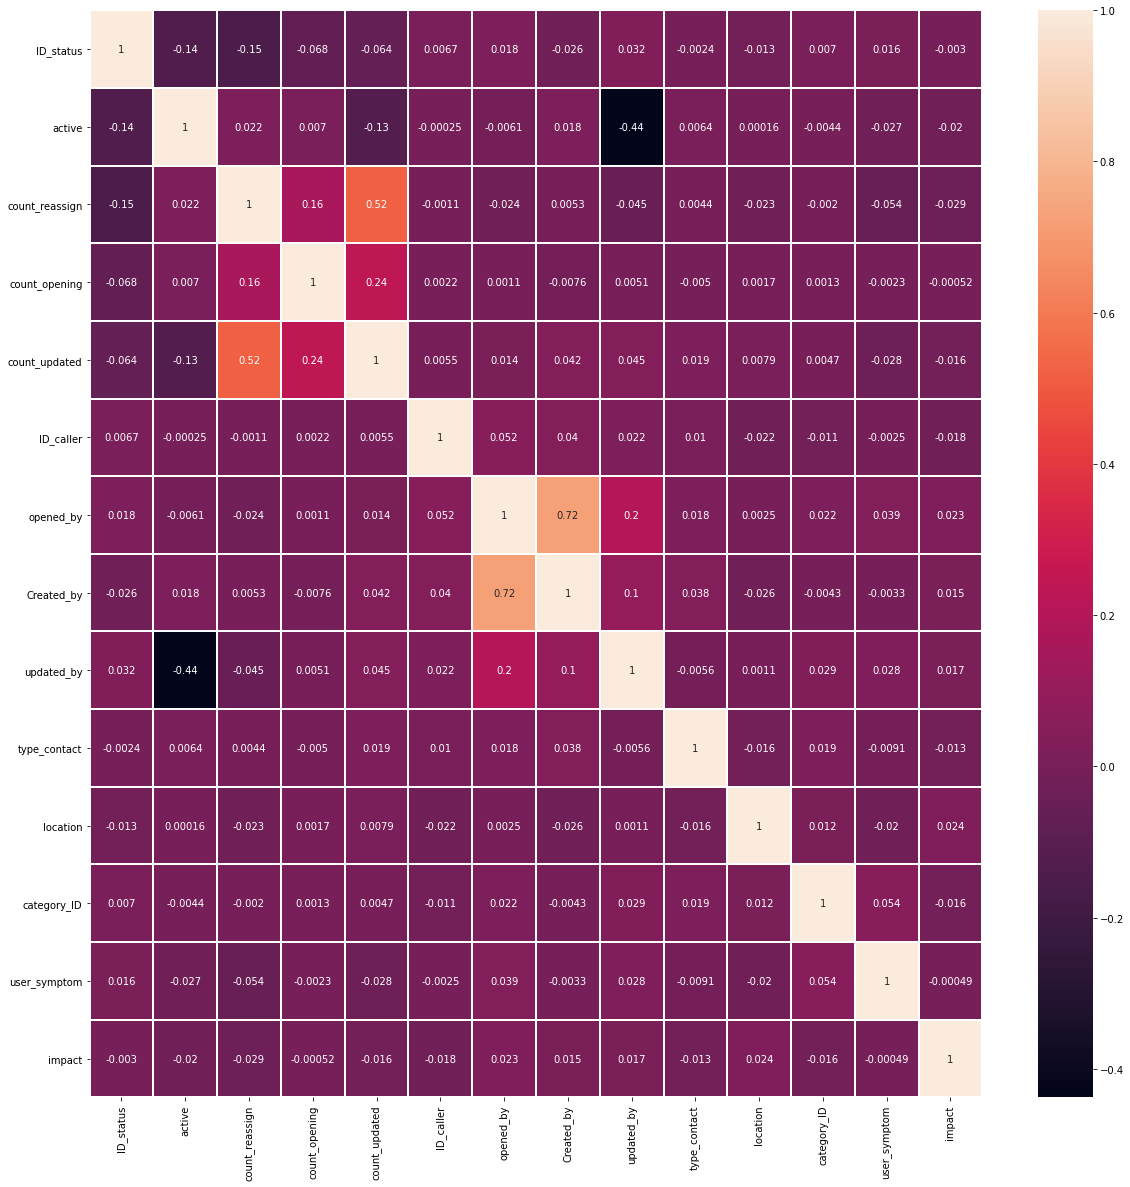

In [87]:
sns.heatmap(acc_df_new.corr(), annot=True, linewidth=0.02)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

Created by and Opened by are strongly positive corelated. Also count_reassign and count_updated (more updates = more chance to reassign)

In [88]:
acc_df_new[acc_df_new.opened_by == acc_df_new.Created_by].shape

(13, 17)

In [89]:
acc_df_new.shape

(84892, 17)

In [90]:
acc_df_new.head()

,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,category_ID,user_symptom,impact
0,6,1,0,0,0,2403,8,2016-02-29 01:16:00,6,2016-02-29 01:23:00,21,2016-02-29 01:23:00,3,143,55,72,2
1,7,1,0,0,3,2403,8,2016-02-29 01:16:00,6,2016-02-29 01:23:00,804,2016-02-29 11:29:00,3,143,55,72,2
2,5,0,0,0,4,2403,8,2016-02-29 01:16:00,6,2016-02-29 01:23:00,908,2016-05-03 12:00:00,3,143,55,72,2
3,0,1,1,0,1,2403,397,2016-02-29 04:40:00,171,2016-02-29 04:57:00,21,2016-02-29 05:30:00,3,165,40,471,2
4,0,1,1,0,2,2403,397,2016-02-29 04:40:00,171,2016-02-29 04:57:00,21,2016-02-29 05:33:00,3,165,40,471,2


No I will extract year, month, day an hour from opened_at, created_at, updated_at it will tell more to model than just date

In [91]:
cols_to_change = ['opened_time', 'created_at', 'updated_at']

In [92]:
for col in cols_to_change:
    col_year = col + '_year'
    col_month = col + '_month' 
    col_day = col + '_day' 
    col_hour = col + '_hour' 
    acc_df_new[col_year] = acc_df_new[col].dt.year
    acc_df_new[col_month] = acc_df_new[col].dt.month
    acc_df_new[col_day] = acc_df_new[col].dt.day
    acc_df_new[col_hour] = acc_df_new[col].dt.hour

In [93]:
acc_df_new=acc_df_new.drop(cols_to_change,axis=1)

In [94]:
acc_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84892 entries, 0 to 99197
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID_status          84892 non-null  int32
 1   active             84892 non-null  int64
 2   count_reassign     84892 non-null  int64
 3   count_opening      84892 non-null  int64
 4   count_updated      84892 non-null  int64
 5   ID_caller          84892 non-null  int64
 6   opened_by          84892 non-null  int64
 7   Created_by         84892 non-null  int64
 8   updated_by         84892 non-null  int64
 9   type_contact       84892 non-null  int32
 10  location           84892 non-null  int64
 11  category_ID        84892 non-null  int64
 12  user_symptom       84892 non-null  int64
 13  impact             84892 non-null  int64
 14  opened_time_year   84892 non-null  int64
 15  opened_time_month  84892 non-null  int64
 16  opened_time_day    84892 non-null  int64
 17  opened_time_

# Separate Features and labels

In [95]:
y = acc_df_new['impact']
X = acc_df_new.copy()
X=X.drop('impact',axis=1)

In [96]:
y.value_counts(normalize=True)

2    0.946838
3    0.027859
1    0.025303
Name: impact, dtype: float64

C:\Users\Darth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


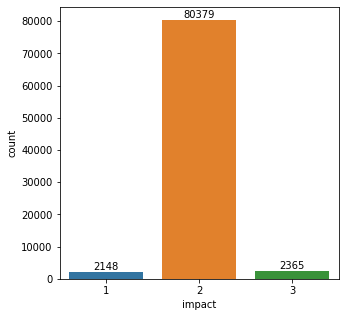

In [140]:
plt.figure(figsize=(5,5))
ax = sns.countplot(y)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Data is highly unbalanced almost 95% of all impacts are medium ones. I need to balance the data set

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [99]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(59424, 25) (25468, 25) (59424,) (25468,)


In [100]:
y_train.value_counts()

2    56272
3     1658
1     1494
Name: impact, dtype: int64

### Original Oversampling
#### I have added later Oversampling and then Undersampling because I did not see improvement with balanced data

In [101]:
impact_2_size = y_train[y_train == 2].shape[0]

In [102]:
oversample=SMOTE()

x_balanced_over, y_balanced_over=oversample.fit_resample(X_train, y_train)
y_balanced_over = pd.Series(y_balanced_over)

print("Impact counts before balancing:\n ",y_train.value_counts())
print("Impact counts after balancing: \n",y_balanced_over.value_counts())

Impact counts before balancing:
  2    56272
3     1658
1     1494
Name: impact, dtype: int64
Impact counts after balancing: 
 1    56272
2    56272
3    56272
Name: impact, dtype: int64


### Oversampling and Undersampling

In [103]:
class_size = int(impact_2_size*0.7)

pipe = make_pipeline(
    SMOTE(sampling_strategy={1 : class_size, 3 : class_size}),
    NearMiss(sampling_strategy={2 : class_size}
))

x_balanced, y_balanced = pipe.fit_resample(X_train, y_train)




print("Impact counts before balancing:\n ", y_train.value_counts())
print("Impact counts after balancing: \n", y_balanced.value_counts())

Impact counts before balancing:
  2    56272
3     1658
1     1494
Name: impact, dtype: int64
Impact counts after balancing: 
 1    39390
2    39390
3    39390
Name: impact, dtype: int64


## Feature extraction

### Univariate feature selection with chi2

In [104]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=15)
fit = test.fit(x_balanced, y_balanced)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(x_balanced)

[8.996e+02 2.632e+02 3.668e+03 3.959e+02 1.275e+04 3.786e+05 1.213e+06
 2.616e+05 1.622e+05 1.000e+00 1.541e+04 5.296e+03 9.404e+04 1.449e-04
 2.259e+03 1.307e+04 6.154e+03 1.449e-04 2.256e+03 1.307e+04 6.031e+03
 1.665e-04 1.587e+03 1.148e+04 2.728e+03]


In [105]:
scores=fit.scores_
scores=pd.Series(scores)
scores.index=X.columns
scores=scores.sort_values(ascending=False)

<AxesSubplot:>

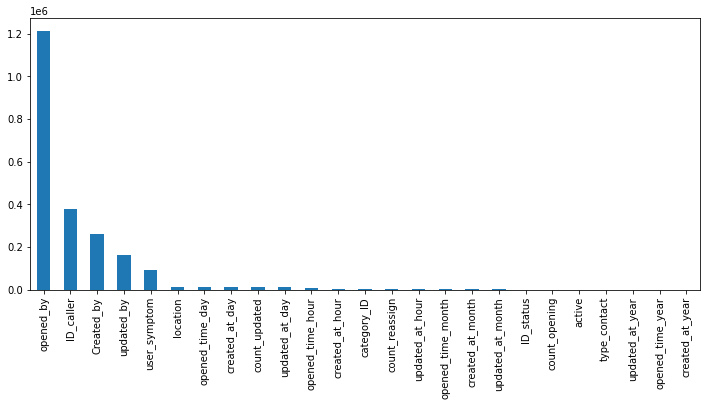

In [106]:
plt.figure(figsize=(12,5))
scores.plot.bar()

In [107]:
print(scores[:15])

opened_by           1.212851e+06
ID_caller           3.786453e+05
Created_by          2.616482e+05
updated_by          1.622088e+05
user_symptom        9.403580e+04
location            1.541294e+04
opened_time_day     1.307295e+04
created_at_day      1.307169e+04
count_updated       1.275384e+04
updated_at_day      1.147804e+04
opened_time_hour    6.154059e+03
created_at_hour     6.031148e+03
category_ID         5.296052e+03
count_reassign      3.667601e+03
updated_at_hour     2.728447e+03
dtype: float64


### Univariate feature selection with Mutual information classificator

In [108]:
from sklearn.feature_selection import mutual_info_classif
fs = SelectKBest(score_func=mutual_info_classif, k=15)
fs.fit(x_balanced, y_balanced)
X_train_fs = fs.transform(x_balanced)
print(fs.scores_)

[0.083 0.015 0.012 0.002 0.042 0.36  0.526 0.25  0.35  0.013 0.171 0.182
 0.154 0.01  0.03  0.072 0.085 0.006 0.031 0.071 0.086 0.006 0.028 0.06
 0.042]


In [109]:
X.columns[fs.get_support()]

Index(['ID_status', 'count_updated', 'ID_caller', 'opened_by', 'Created_by',
       'updated_by', 'location', 'category_ID', 'user_symptom',
       'opened_time_day', 'opened_time_hour', 'created_at_day',
       'created_at_hour', 'updated_at_day', 'updated_at_hour'],
      dtype='object')

In [110]:
m_i_c_scores=fs.scores_
m_i_c_scores=pd.Series(m_i_c_scores)
m_i_c_scores.index=X.columns
m_i_c_scores=m_i_c_scores.sort_values(ascending=False)

<AxesSubplot:>

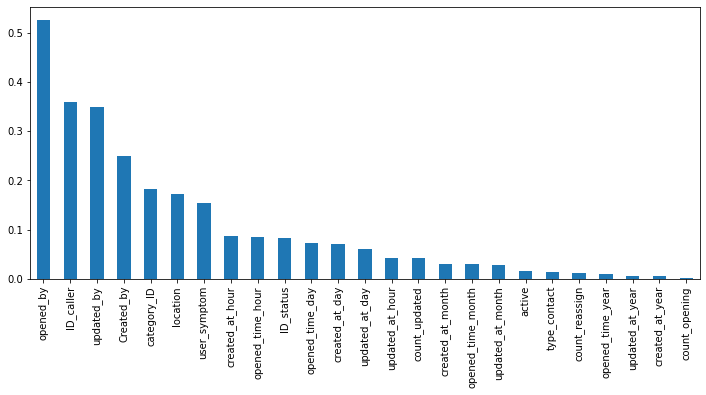

In [111]:
plt.figure(figsize=(12,5))
m_i_c_scores.plot.bar()

In [112]:
print(m_i_c_scores[:15])

opened_by           0.525601
ID_caller           0.359675
updated_by          0.349508
Created_by          0.250025
category_ID         0.182087
location            0.171439
user_symptom        0.153584
created_at_hour     0.086271
opened_time_hour    0.084986
ID_status           0.083456
opened_time_day     0.072204
created_at_day      0.070787
updated_at_day      0.059803
updated_at_hour     0.042377
count_updated       0.042056
dtype: float64


### Feature selection with Decision Tree Classifier

In [113]:
from sklearn.tree import  DecisionTreeClassifier
model = DecisionTreeClassifier()
fit=model.fit(x_balanced, y_balanced)
print(model.feature_importances_)

[3.944e-02 1.659e-03 1.271e-02 5.599e-04 4.023e-02 1.073e-01 3.060e-01
 6.239e-02 4.064e-02 1.874e-03 4.891e-02 6.030e-02 4.583e-02 2.487e-04
 2.238e-02 2.072e-02 1.650e-02 4.424e-04 1.693e-02 2.198e-02 7.948e-02
 9.813e-04 1.723e-02 2.247e-02 1.281e-02]


In [114]:
features_imp=model.feature_importances_
features_imp=pd.Series(features_imp)
features_imp.index=X.columns
features_imp=features_imp.sort_values(ascending=False)

<AxesSubplot:>

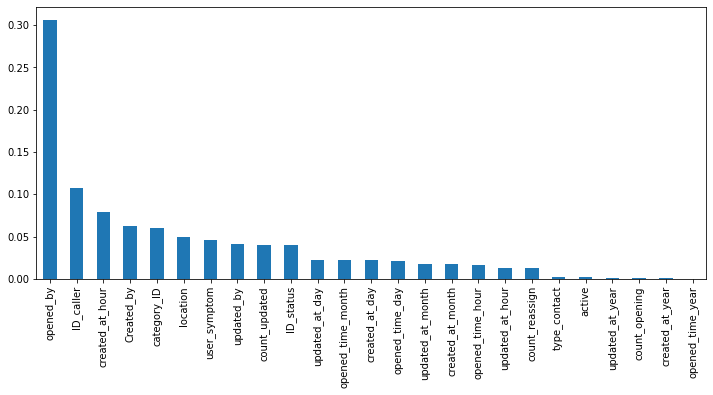

In [115]:
plt.figure(figsize=(12,5))
features_imp.plot.bar()

In [116]:
print(features_imp[:15])

opened_by            0.305986
ID_caller            0.107326
created_at_hour      0.079477
Created_by           0.062389
category_ID          0.060304
location             0.048905
user_symptom         0.045825
updated_by           0.040635
count_updated        0.040230
ID_status            0.039436
updated_at_day       0.022473
opened_time_month    0.022375
created_at_day       0.021982
opened_time_day      0.020721
updated_at_month     0.017227
dtype: float64


## Selecting intersection of all feature selection methods

In [117]:
chi2_features=scores[:15].to_dict()
chi2_features=set(chi2_features.keys())

mutualinfo_features=set(X.columns[fs.get_support()])

rfe_features=features_imp[:15].to_dict()
rfe_features=set(rfe_features.keys())

In [118]:
chi2_features = chi2_features.intersection(mutualinfo_features)
output_set = chi2_features.intersection(rfe_features)
output_list = list(output_set)
print(output_list)

['count_updated', 'created_at_hour', 'user_symptom', 'updated_at_day', 'ID_caller', 'updated_by', 'Created_by', 'opened_time_day', 'created_at_day', 'opened_by', 'location', 'category_ID']


### New columns

In [119]:
columns=['opened_time_day', 'updated_by', 'opened_time_hour', 'created_at_hour', 'ID_caller', 'opened_by', 'Created_by', 'location', 'category_ID', 'count_updated', 'created_at_day', 'updated_at_day']
X_train_new=X_train[columns]
X_test_new=X_test[columns]

In [120]:
x_balanced_new = pd.DataFrame(x_balanced, columns=X.columns)
x_balanced_over_new = pd.DataFrame(x_balanced_over, columns=X.columns)
x_balanced_new = x_balanced_new[columns]
x_balanced_over_new = x_balanced_over_new[columns]
print(x_balanced_new.shape)
print(x_balanced_over_new.shape)

(118170, 12)
(168816, 12)


In [121]:
y_balanced.shape

(118170,)

In [122]:
y_balanced_over.shape

(168816,)

# Model selection building

Models for prediction

In [123]:
dtree_clf = DecisionTreeClassifier(random_state=42) 
gb_clf = GradientBoostingClassifier(random_state=42) 
neigh_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier(random_state=42)

In [124]:
model_list = [dtree_clf, gb_clf, neigh_clf, rf_clf]
data_list = [(X_train, y_train, X_test, y_test), (x_balanced, y_balanced, X_test, y_test), 
             (X_train_new, y_train, X_test_new, y_test), (x_balanced_new, y_balanced, X_test_new, y_test), 
             (x_balanced_over_new, y_balanced_over, X_test_new, y_test), (x_balanced_over, y_balanced_over, X_test, y_test)]
dataframe_columns = ['Model', 'Data', 'f1', 'accuracy', 'precision', 'recall']
model_name_list = ['Decision Tree', 'Gradien boosting', 'KNeighbors', 'Random Forest']
data_set_name_list = ['Base', 'Balanced', 'Base_reduced_features', 'Balanced_reduced_feauters', 
                      'Balanced_smote_reduced_feauters', 'Balanced_smote']
result_list = []

In [125]:
for i, model in enumerate(model_list):
    for j, data in enumerate(data_list):
        print(model_name_list[i], data_set_name_list[j])
        x_train_tmp, y_train_tmp, x_test_tmp, y_test_tmp = data
        model_tmp = model.fit(x_train_tmp, y_train_tmp)
        model_pred_tmp = model_tmp.predict(x_test_tmp)
        f1_tmp = round(f1_score(y_test_tmp, model_pred_tmp, average='macro')*100.0,2)
        acc_tmp = round(accuracy_score(y_test_tmp, model_pred_tmp)*100.0,2)
        prec_tmp = round(precision_score(y_test_tmp, model_pred_tmp, average='macro')*100.0,2)
        rec_tmp = round(recall_score(y_test_tmp, model_pred_tmp, average='macro')*100.0,2)
        result_values_tmp = [model_name_list[i], data_set_name_list[j], f1_tmp, acc_tmp, prec_tmp, rec_tmp]
        result_list.append(result_values_tmp)

Decision Tree Base
Decision Tree Balanced
Decision Tree Base_reduced_features
Decision Tree Balanced_reduced_feauters
Decision Tree Balanced_smote_reduced_feauters
Decision Tree Balanced_smote
Gradien boosting Base
Gradien boosting Balanced
Gradien boosting Base_reduced_features
Gradien boosting Balanced_reduced_feauters
Gradien boosting Balanced_smote_reduced_feauters
Gradien boosting Balanced_smote
KNeighbors Base
KNeighbors Balanced
KNeighbors Base_reduced_features
KNeighbors Balanced_reduced_feauters
KNeighbors Balanced_smote_reduced_feauters
KNeighbors Balanced_smote
Random Forest Base
Random Forest Balanced
Random Forest Base_reduced_features
Random Forest Balanced_reduced_feauters
Random Forest Balanced_smote_reduced_feauters
Random Forest Balanced_smote


In [126]:
result_df_scores = pd.DataFrame(result_list, columns=dataframe_columns)

In [127]:
result_df_scores

,Model,Data,f1,accuracy,precision,recall
0,Decision Tree,Base,0.8310,97.35,81.68,84.67
1,Decision Tree,Balanced,0.5946,89.48,52.75,77.67
2,Decision Tree,Base_reduced_features,0.8340,97.43,82.66,84.24
3,Decision Tree,Balanced_reduced_feauters,0.6394,91.41,56.73,80.60
4,Decision Tree,Balanced_smote_reduced_feauters,0.7273,94.80,66.86,81.90
5,Decision Tree,Balanced_smote,0.6823,93.77,62.85,77.12
6,Gradien boosting,Base,0.4831,95.25,79.21,43.07
7,Gradien boosting,Balanced,0.4743,79.35,44.02,73.12
8,Gradien boosting,Base_reduced_features,0.4699,95.14,79.82,42.12
9,Gradien boosting,Balanced_reduced_feauters,0.4534,76.04,42.96,73.92


In [128]:
result_df_scores.sort_values(['f1', 'accuracy'], ascending=False, inplace=True)

In [129]:
result_df_scores

,Model,Data,f1,accuracy,precision,recall
20,Random Forest,Base_reduced_features,0.8477,98.01,95.16,77.65
2,Decision Tree,Base_reduced_features,0.8340,97.43,82.66,84.24
0,Decision Tree,Base,0.8310,97.35,81.68,84.67
22,Random Forest,Balanced_smote_reduced_feauters,0.8214,97.20,82.42,82.86
18,Random Forest,Base,0.8194,97.74,95.20,73.79
23,Random Forest,Balanced_smote,0.8045,97.21,84.84,77.43
21,Random Forest,Balanced_reduced_feauters,0.7678,95.75,72.05,84.47
19,Random Forest,Balanced,0.7580,95.78,72.42,81.24
4,Decision Tree,Balanced_smote_reduced_feauters,0.7273,94.80,66.86,81.90
5,Decision Tree,Balanced_smote,0.6823,93.77,62.85,77.12


In [130]:
result_df_scores.to_csv('result_dataframe.csv', index=False)

### Random Forest Classifier is having the best results (f1 score and accuracy) for base data with reduced features. It seems that oversampling did not help in this case.

## Hyperparameter Optimization

In [131]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 10)]

# Number of features to consider at every split
max_features = ['sqrt', 'log2', None]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 5]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300], 'max_features': ['sqrt', 'log2', None], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 5], 'bootstrap': [True, False]}


In [132]:
rf = RandomForestClassifier() 

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, scoring= 'f1_macro', 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train_new, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [10, 42, 74, 106, 138,
                                                         171, 203, 235, 267,
                                                         300]},
                   random_state=42, scoring='f1_macro', verbose=2)

In [133]:
rf_random.best_params_

{'n_estimators': 74,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 60,
 'bootstrap': False}

## Model evaluation

I am reausing code snippet from my loop above

In [134]:

x_train_tmp, y_train_tmp, x_test_tmp, y_test_tmp = X_train_new, y_train, X_test_new, y_test

base_model = RandomForestClassifier(n_estimators=138,min_samples_split=2,min_samples_leaf=1,
                                    max_features='auto',max_depth=50, bootstrap=False,
                                    random_state = 42)

model_tmp = base_model.fit(x_train_tmp, y_train_tmp)
model_pred_tmp = model_tmp.predict(x_test_tmp)
f1_tmp = round(f1_score(y_test_tmp, model_pred_tmp, average='macro')*100.0,2)
acc_tmp = round(accuracy_score(y_test_tmp, model_pred_tmp)*100.0,2)
prec_tmp = round(precision_score(y_test_tmp, model_pred_tmp, average='macro')*100.0,2)
rec_tmp = round(recall_score(y_test_tmp, model_pred_tmp, average='macro')*100.0,2)
result_values_tmp = ['Random Forest Optimized', 'Base_reduced_features', f1_tmp, acc_tmp, prec_tmp, rec_tmp]
result_list.append(result_values_tmp)

C:\Users\Darth\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [135]:
report = classification_report(y_test_tmp, model_pred_tmp, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
1,0.901186,0.697248,0.786207,654.000000
2,0.986820,0.997013,0.991891,24107.000000
3,0.955446,0.818953,0.881950,707.000000
accuracy,0.984373,0.984373,0.984373,0.984373
macro avg,0.947817,0.837738,0.886682,25468.000000
weighted avg,0.983750,0.984373,0.983557,25468.000000


## All results togheter

In [136]:
result_df_scores = pd.DataFrame(result_list, columns=dataframe_columns)
result_df_scores.sort_values(['f1', 'accuracy'], ascending=False, inplace=True)
result_df_scores.to_csv('result_dataframe.csv', index=False)
result_df_scores

,Model,Data,f1,accuracy,precision,recall
24,Random Forest Optimized,Base_reduced_features,0.8867,98.44,94.78,83.77
20,Random Forest,Base_reduced_features,0.8477,98.01,95.16,77.65
2,Decision Tree,Base_reduced_features,0.8340,97.43,82.66,84.24
0,Decision Tree,Base,0.8310,97.35,81.68,84.67
22,Random Forest,Balanced_smote_reduced_feauters,0.8214,97.20,82.42,82.86
18,Random Forest,Base,0.8194,97.74,95.20,73.79
23,Random Forest,Balanced_smote,0.8045,97.21,84.84,77.43
21,Random Forest,Balanced_reduced_feauters,0.7678,95.75,72.05,84.47
19,Random Forest,Balanced,0.7580,95.78,72.42,81.24
4,Decision Tree,Balanced_smote_reduced_feauters,0.7273,94.80,66.86,81.90


### Hyperparameter Optimization increased F1 score by 3.9%, accuracy by 0.43%

### Confusion matrix for best model

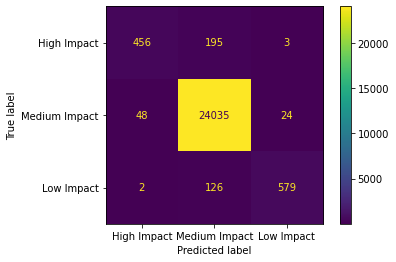

In [139]:
cm = confusion_matrix(y_test_tmp, model_pred_tmp, labels=base_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['High Impact','Medium Impact','Low Impact'])
disp.plot()
plt.show()